In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data/CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')
df.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Universitario,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes


In [45]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str) + df['day'].astype(str), format='%Y%m%d')
df.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans,datetime
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes,2020-10-02
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes,2020-10-14
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes,2020-10-29
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes,2020-11-03
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes,2020-11-12


In [16]:
df.columns

Index(['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour',
       'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia',
       'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador',
       'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor',
       'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct',
       'response_duration_ms', 'performance', 'mean_congruent',
       'inhib_control', 'z_performance', 'z_mean_incongruent',
       'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h',
       'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
       'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg',
       'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day',
       'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day',
       'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h',
       'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary',
     

In [17]:
df['ID_Zenodo'].value_counts() #most people appear many times in the dataset

86     20
216    17
79     16
98     16
201    15
       ..
198     3
49      3
36      2
126     2
173     1
Name: ID_Zenodo, Length: 288, dtype: int64

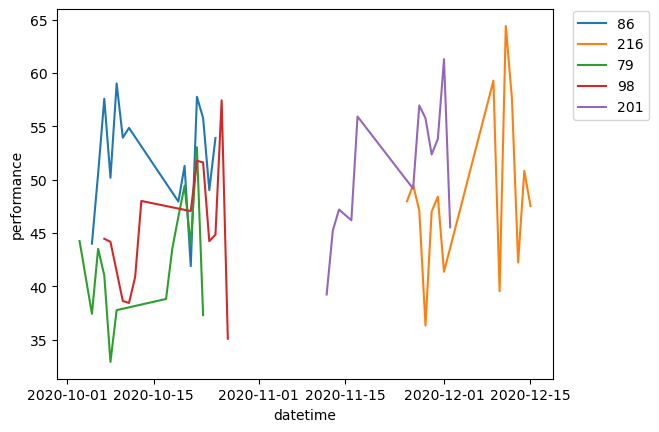

In [72]:
for i in [86, 216, 79, 98, 201]:
    sns.lineplot(x='datetime', y='performance', data = df[df['ID_Zenodo'] == i], label=str(i))
    plt.legend(loc=(1.04, 0.7));

How do the other factors vary by age and gender? \
How do responses in mental health tests vary by age and gender.

In [9]:
# distributions of age and gender

(array([269., 332., 363., 377., 376., 254., 172.,  46.,   5.,  22.]),
 array([18. , 23.8, 29.6, 35.4, 41.2, 47. , 52.8, 58.6, 64.4, 70.2, 76. ]),
 <BarContainer object of 10 artists>)

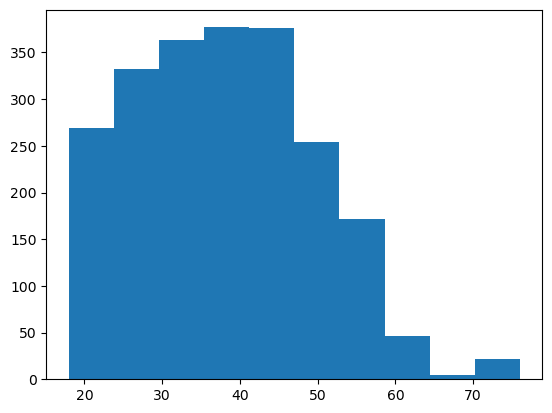

In [3]:
plt.hist(df['age'])

<AxesSubplot: >

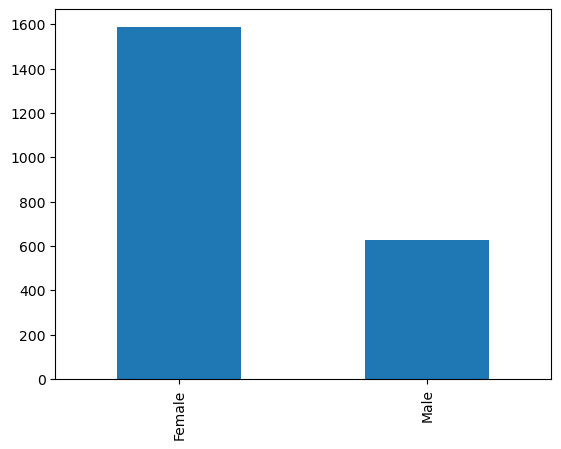

In [8]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='age', ylabel='performance'>

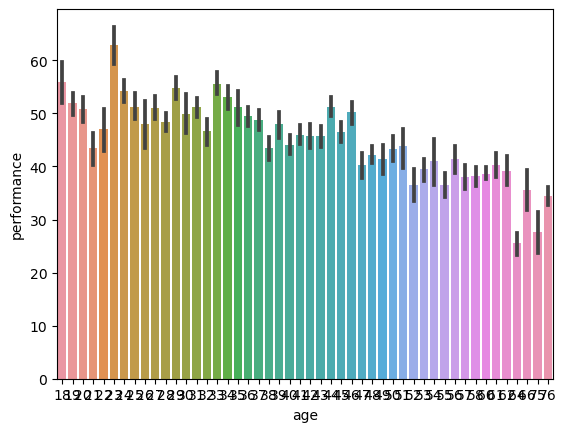

In [13]:
sns.barplot(x=df['age'], y=df['performance'])